In [23]:
import pyleoclim as pyleo
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn import metrics
pyleo.set_style('journal')

# load the data
data = sio.loadmat('./example_data/wtc_test_data_nino.mat')

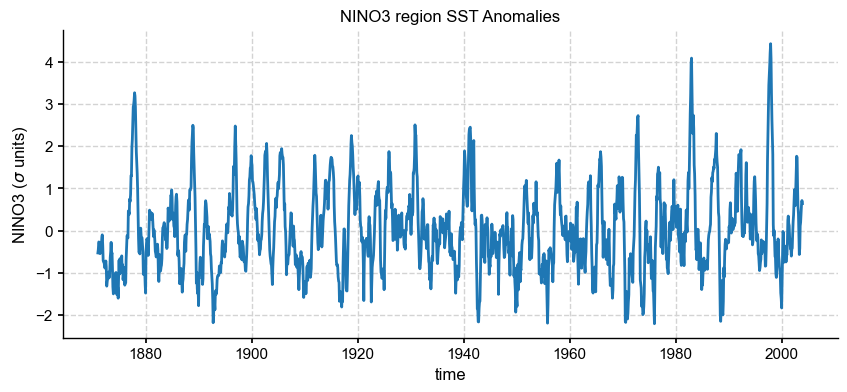

In [7]:
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]
ts_nino = pyleo.Series(time=t, value=nino)
ts_n    = ts_nino.standardize()
fig, ax = ts_n.plot(title='NINO3 region SST Anomalies',mute=True)
ax.set_ylabel(r'NINO3 ($\sigma$ units)')
pyleo.showfig(fig)

In [8]:
nino_ssa = ts_n.ssa(M = 60)

In [9]:
d  = nino_ssa['eig_val'] # extract eigenvalue vector
M  = len(d)  # infer window size
de = d*np.sqrt(2/(M-1))
var_pct = d**2/np.sum(d**2)*100  # extract the fraction of variance attributable to each mode
r = 20
rk = np.arange(0,r)+1

assert np.abs(var_pct[15:].sum()*100-4.825612144779388) < 1e-6

/Users/julieneg/opt/miniconda3/envs/pyleo/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


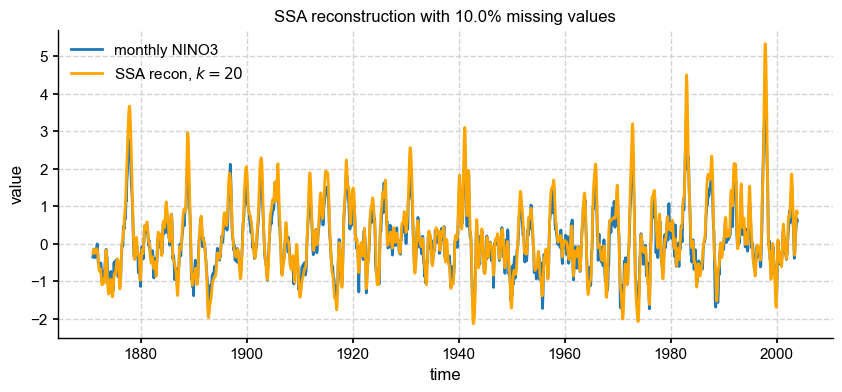

In [19]:
nino_mcssa = ts_n.ssa(M = 60, nMC=1000)
#assert what?

# SSA with missing values
n = len(nino)
fm = 0.1  #fraction of missing values
missing = np.random.choice(n,np.floor(fm*n).astype('int'),replace=False)
nino_miss = np.copy(ts_n.value)
nino_miss[missing] = np.nan  # put NaNs at the randomly chosen locations
ts_miss = pyleo.Series(time=t,value=nino_miss,clean_ts=False)
miss_ssa = ts_miss.ssa(M = 60)
RCmiss = miss_ssa['RC'][:,:19].sum(axis=1)

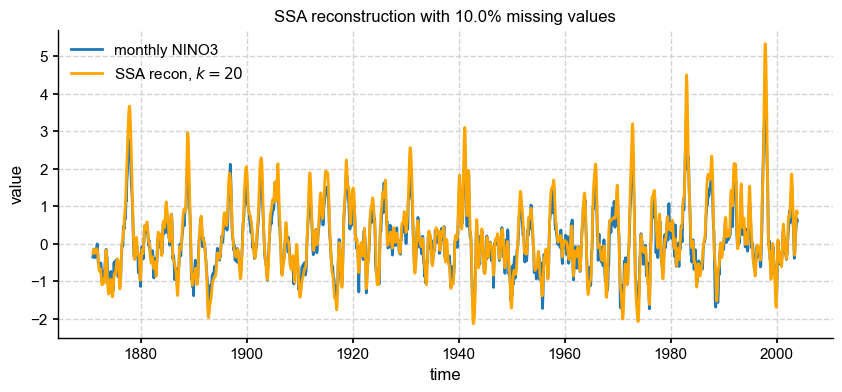

In [20]:
fig, ax = ts_nino.plot(title=r'SSA reconstruction with '+ str(fm*100) +'% missing values',mute=True,label='monthly NINO3')
ax.plot(t,RCmiss,label='SSA recon, $k=20$',color='orange')
ax.legend()
pyleo.showfig(fig)

In [25]:
MSE = metrics.mean_squared_error(nino, RCmiss)
assert MSE < 0.1

In [26]:
ssa?

Object `ssa` not found.


In [27]:
ts_n.ssa?